<a href="https://colab.research.google.com/github/SuperPanww/courses_ML20/blob/master/hw2_panww.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!gdown --id '1KSFIRh0-_Vr7SdiSCZP1ItV7bXPxMD92' --output data.tar.gz
!tar -zxvf data.tar.gz
!ls

Downloading...
From: https://drive.google.com/uc?id=1KSFIRh0-_Vr7SdiSCZP1ItV7bXPxMD92
To: /content/data.tar.gz
6.11MB [00:00, 54.0MB/s]
data/
data/sample_submission.csv
data/test_no_label.csv
data/train.csv
data/X_test
data/X_train
data/Y_train
data  data.tar.gz  sample_data


In [0]:
import numpy as np
np.random.seed(0)
X_train_fpath = './data/X_train'
Y_train_fpath = './data/Y_train'
X_test_fpath = './data/X_test'
output_fpath = './output_{}.csv'

with open(X_train_fpath) as f:
  next(f)
  X_train = np.array([line.strip('\n').split(',')[1:] for line in f],dtype = float)
with open(Y_train_fpath) as f:
  next(f)
  Y_train = np.array([line.strip('\n').split(',')[1:] for line in f],dtype = float)
with open(X_test_fpath) as f:
  next(f)
  X_test = np.array([line.strip('\n').split(',')[1:] for line in f],dtype = float)

In [0]:
def _normalize(X,train = True,specified_colum = None,X_mean = None,X_std = None):
  if specified_colum == None:
    specified_colum = np.arange(X.shape[1])
  if train:
    X_mean = np.mean(X[:,specified_colum],0).reshape(1,-1)
    X_std = np.std(X[:,specified_colum],0).reshape(1,-1)
  X[:,specified_colum] = (X[:,specified_colum]-X_mean) / (X_std + 1e-8)
  return X,X_mean,X_std

In [0]:
def _train_dev_split(X,Y,dev_ratio = 0.25):
  train_size = int(int(len(X)*(1-dev_ratio)))
  return X[:train_size],Y[:train_size],X[train_size:],Y[train_size:]

In [5]:
X_train,X_mean,X_std = _normalize(X_train,train=True)
X_test,_,_ = _normalize(X_test,train=False,specified_colum=None,X_mean=X_mean,X_std=X_std)
dev_ratio = 0.1
X_train,Y_train,X_dev,Y_dev = _train_dev_split(X_train,Y_train,dev_ratio=dev_ratio)

train_size = X_train.shape[0]
dev_size = X_dev.shape[0]
test_size = X_test.shape[0]
data_dim = X_train.shape[1]

print('Size of training set: {}'.format(train_size))
print('Size of development set: {}'.format(dev_size))
print('Size of testing set: {}'.format(test_size))
print('Dimension of data: {}'.format(data_dim))

Size of training set: 48830
Size of development set: 5426
Size of testing set: 27622
Dimension of data: 510


In [0]:
def _shuffle(X,Y):
  randomize = np.arange(len(X))
  np.random.shuffle(randomize)
  return (X[randomize],Y[randomize])

In [0]:
def _sigmoid(z):
  return np.clip(1/(1.0 + np.exp(-z)),1e-8,1-(1e-8))

In [0]:
def _f(X,w,b):
  return _sigmoid(np.matmul(X,w)+b)

In [0]:
def _predict(X,w,b):
  return np.round(_f(X,w,b)).astype(np.int)

In [0]:
def _accuracy(Y_pred,Y_label):
  acc = 1 - np.mean(np.abs(Y_pred - Y_label))

  return acc

In [0]:
def _cross_entropy_loss(Y_pred,Y_label):
  cross_entropy = -np.dot(Y_pred,np.log(Y_label))-np.dot((1-Y_pred),np.log(1-Y_label))
  return cross_entropy

In [0]:
def _gradient(X,Y_label,w,b):
  Y_pred = _f(X,w,b)
  pred_error = Y_label-Y_pred
  w_grad = -np.sum(np.dot(X.T,pred_error),1)
  b_grad = -np.sum(pred_error)
  return w_grad,b_grad

In [23]:
w = np.zeros((data_dim))
b = np.zeros((1,))

max_iter = 10
batch_size = 8
learning_rate = 0.2

train_loss = 10
batch_size = 8
learning_rate = 0.2

train_loss = []
dev_loss = []
train_acc = []
dev_acc = []

step = 1
for epoch in range(max_iter):
  X_train, Y_train = _shuffle(X_train,Y_train)
 
  for idx in range(int(np.floor(train_size / batch_size))):
    X = X_train[idx * batch_size:(idx+1)*batch_size]
    Y = Y_train[idx * batch_size:(idx+1)*batch_size]

    w_grad,b_grad = _gradient(X,Y,w,b)
    w = w - learning_rate/np.sqrt(step) * w_grad
    b = b - learning_rate/np.sqrt(step) * b_grad
    
    step = step + 1

  y_train_pred = _f(X_train,w,b)
  Y_train_pred = np.round(y_train_pred)
  train_acc.append(_accuracy(Y_train_pred,Y_train.T))
  train_loss.append(_cross_entropy_loss(y_train_pred,Y_train)/train_size)

  y_dev_pred = _f(X_dev,w,b)
  Y_dev_pred = np.round(y_dev_pred)
  dev_acc.append(_accuracy(Y_dev_pred,Y_dev.T))
  dev_loss.append(_cross_entropy_loss(y_dev_pred,Y_dev)/dev_size)

print('Training loss: {}'.format(train_loss[-1]))
print('Development loss: {}'.format(dev_loss[-1]))
print('Training accuracy: {}'.format(train_acc[-1]))
print('Development accuracy: {}'.format(dev_acc[-1]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


Training loss: [inf]
Development loss: [inf]
Training accuracy: 0.7211755068605366
Development accuracy: 0.7241061555473645


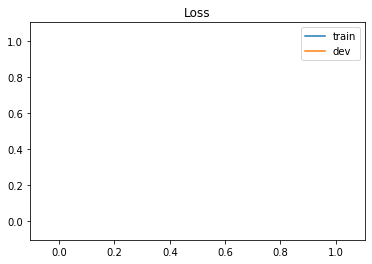

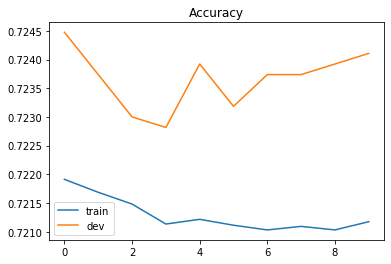

In [24]:
import matplotlib.pyplot as plt

plt.plot(train_loss)
plt.plot(dev_loss)
plt.title('Loss')
plt.legend(['train','dev'])
plt.savefig('loss.png')
plt.show()

plt.plot(train_acc)
plt.plot(dev_acc)
plt.title('Accuracy')
plt.legend(['train','dev'])
plt.savefig('acc.png')
plt.show()

In [19]:
Y_train.T

array([[0., 0., 0., ..., 0., 0., 0.]])